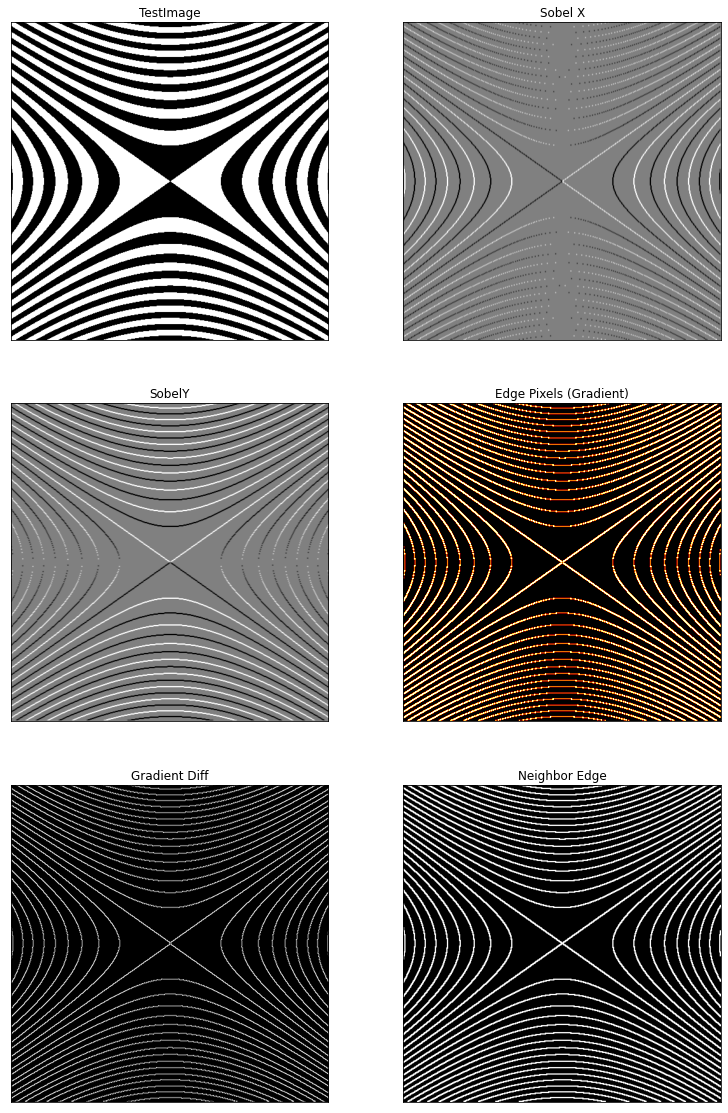

Mean Absolute Gradient Diff - Neighbor Edge =  0.15542743855574534


In [38]:
import cv2             #opencv library
import numpy as np     #numerical python 
import matplotlib.pyplot as plt     #math plot
from matplotlib.colors import LinearSegmentedColormap
import math
#Steven Taylor Edge Detection Assignment
#all credit for this program goes to Dr. Cameron
width = 500
height = 500

def makeImage(things):
    myImg= np.zeros([width,height], np.int16)  #initializing a new image
    
    for row in range(0, height):
        a=row/height *2 - 1
        for col in range(0,width):
            b= col/width * 2 - 1
            value =int((np.sin(a) *a + np.cos(b)) * things)
            myImg[row,col] = (value % 2) * 256
    
    return myImg
def annotateImage(image, edgeImage):
    result = np.zeros([width,height], np.int16)  #initializing a new image  
    result = image.copy()
    for row in range(0, height):
        for col in range(0,width):
            if edgeImage[row,col] > 0:
                result[row,col] = 128
            
    return result
def imageDiff(image1, image2):
    #image1, image2  --> height x width array of unsigned 8bit integers
    #returns the absolute difference between image1 and image2
    diff = np.zeros([width,height], np.uint8)  #initializing a new image each pixel is an unsigned 8bit integer
    for row in range(0, height):
        for col in range(0,width):           
            if image1[row,col] > image2[row][col]:  #this check is performed since we are using unsigned integers  (no negatives)           
                diff[row,col] = image1[row,col] - image2[row,col]
            else:     
                diff[row,col] = image2[row,col] - image1[row,col]
    return diff
    
def edgeMaster(image):
    directions =[[0,-1],[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1]]
    watson = np.zeros([width,height], np.uint8)
    for row in range(0,height):
        for col in range(0,width):
            for i in range(0,8):
                neighborRow = row + directions[i][0]
                neighborCol = col + directions[i][1]
                if neighborRow >= 0 and neighborRow < height and neighborCol >= 0 and neighborCol < width:
                    if(image[row][col] != image[neighborRow,neighborCol]):
                        watson[row,col] = 255
    return watson
#mean abs func
def meanAbs(diffImg):
    sum =0 
    for row in range(0, height):
        for col in range(0, width):
            delta = int(diffImg[row,col])
            delta = delta * delta
            sum = sum + delta
    return math.sqrt(sum)/(width*height)

#diff expected vs calculated


#testImage = makeCheckerBoard(width/squareCount)
testImage = makeImage(20)
edgey = edgeMaster(testImage)
sobelx = cv2.Sobel(testImage,cv2.CV_16S,1,0,ksize=3)  
sobely = cv2.Sobel(testImage,cv2.CV_16S,0,1,ksize=3)  
gradient = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)
annotatedImage = annotateImage(testImage,gradient)
# Create the colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 1, 1)]  #(R,G,B)   [black, red, white]
myColorMap = LinearSegmentedColormap.from_list('edgeMap', colors, N=256)    
diff = imageDiff(testImage,gradient)  
diff2 = imageDiff(diff,edgey)
#first digit => number of rows 
#second digit => number of columns
#third digit => index position in grid 
plt.figure(figsize=(20, 20))
plt.subplot(321);plt.imshow(testImage, cmap='gray') 
plt.title('TestImage'), plt.xticks([]), plt.yticks([])
plt.subplot(322);plt.imshow(sobelx, cmap='gray') 
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(323);plt.imshow(sobely, cmap='gray')
plt.title('SobelY'), plt.xticks([]), plt.yticks([])
plt.subplot(324);plt.imshow(gradient, cmap='afmhot')
plt.title('Edge Pixels (Gradient)'), plt.xticks([]), plt.yticks([])
plt.subplot(325);plt.imshow(diff, cmap='gray') 
plt.title('Gradient Diff'), plt.xticks([]), plt.yticks([])
plt.subplot(326);plt.imshow(edgey, cmap='gray') 
plt.title('Neighbor Edge'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(top=1, bottom=0.25, left=0, right=0.5)
plt.show()
measure = meanAbs(diff2);
print("Mean Absolute Gradient Diff - Neighbor Edge = ", measure)